# Man City v Real Madrid ▸ Correct Score4:3_ 26 Apr 2022 at 21:00

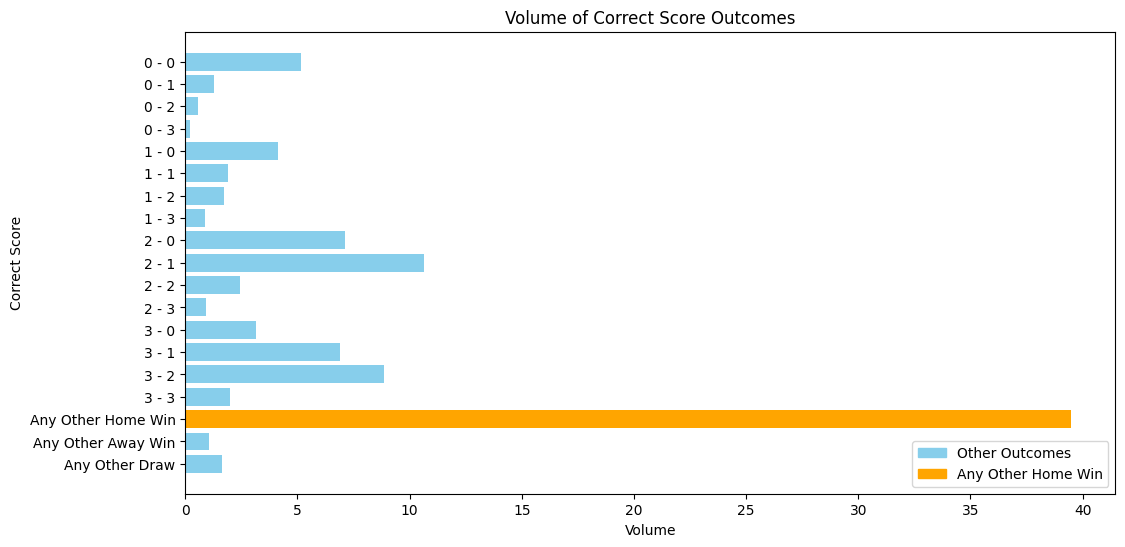

In [1]:
import matplotlib.pyplot as plt
import os

# Extracted data from the HTML code
correct_scores = {
    "0 - 0": {"volume": 5.18, "price": 18.5},
    "0 - 1": {"volume": 1.28, "price": 27},
    "0 - 2": {"volume": 0.56, "price": 55},
    "0 - 3": {"volume": 0.22, "price": 190},
    "1 - 0": {"volume": 4.12, "price": 9.6},
    "1 - 1": {"volume": 1.89, "price": 12},
    "1 - 2": {"volume": 1.74, "price": 24},
    "1 - 3": {"volume": 0.86, "price": 75},
    "2 - 0": {"volume": 7.10, "price": 9},
    "2 - 1": {"volume": 10.62, "price": 9.4},
    "2 - 2": {"volume": 2.43, "price": 23},
    "2 - 3": {"volume": 0.91, "price": 80},
    "3 - 0": {"volume": 3.16, "price": 13},
    "3 - 1": {"volume": 6.89, "price": 12.5},
    "3 - 2": {"volume": 8.88, "price": 27},
    "3 - 3": {"volume": 1.98, "price": 85},
    "Any Other Home Win": {"volume": 39.48, "price": 6.4},
    "Any Other Away Win": {"volume": 1.06, "price": 75},
    "Any Other Draw": {"volume": 1.63, "price": 400},
}

# Extracting data for plotting
outcomes = list(correct_scores.keys())
volumes = [correct_scores[outcome]["volume"] for outcome in outcomes]
prices = [correct_scores[outcome]["price"] for outcome in outcomes]

# Assigning colors to bars
colors = ['skyblue' if outcome != "Any Other Home Win" else 'orange' for outcome in outcomes]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(outcomes, volumes, color=colors)
plt.xlabel('Volume')
plt.ylabel('Correct Score')
plt.title('Volume of Correct Score Outcomes')

# Custom colors for the legend handles
legend_colors = {'Other Outcomes': 'skyblue', 'Any Other Home Win': 'orange'}

# Creating legend handles with custom colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors.values()]

# Adding a legend with custom colored handles
plt.legend(handles, legend_colors.keys(), loc='lower right')

plt.gca().invert_yaxis()  # Invert y-axis to display highest volume at the top


# Save the graph in a folder
output_folder = 'graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'Volume of Correct Score Outcomes_graph.png')
plt.savefig(output_file)

plt.show()



#  Norwegian Eliteserien Leage (Brann - Ham-Kam)_ Wed 17 Apr, 17:00 
# both teams to score (yes option) _info from xcapper
# used table info on web page

Row does not have enough columns: []
Time Data: ['20:55', '20:54', '20:49', '20:38', '20:35', '20:28', '20:27', '20:26', '20:23', '20:22', '20:16', '20:15', '20:14', '20:13', '20:12', '20:11', '20:07', '20:03', '20:02', '19:56', '19:53', '19:51', '19:50', '19:48', '19:45', '19:37', '19:34', '19:33', '19:30', '19:28', '19:23', '19:22', '19:14', '19:13', '19:12', '19:11', '19:07', '19:06', '19:00', '18:58', '18:57', '18:56', '18:55', '18:54', '18:53', '18:52', '18:50', '18:48', '18:47', '18:46', '18:44', '18:38', '18:34', '18:30', '18:22', '18:20', '18:19', '18:08', '18:06', '18:01', '17:58', '17:52', '17:50', '17:49', '17:24', '17:23', '17:21', '17:20', '17:19', '17:17', '16:57', '16:56', '16:55', '16:45', '16:25', '16:22', '16:20', '15:56', '15:50', '15:25', '15:13', '15:10', '15:08', '15:00', '14:43', '14:38', '14:23', '14:19', '13:59', '13:58', '13:41', '13:13', '13:04', '13:02', '13:00', '20:55', '20:54', '20:49', '20:38', '20:35', '20:28', '20:27', '20:26', '20:23', '20:22', '20:16

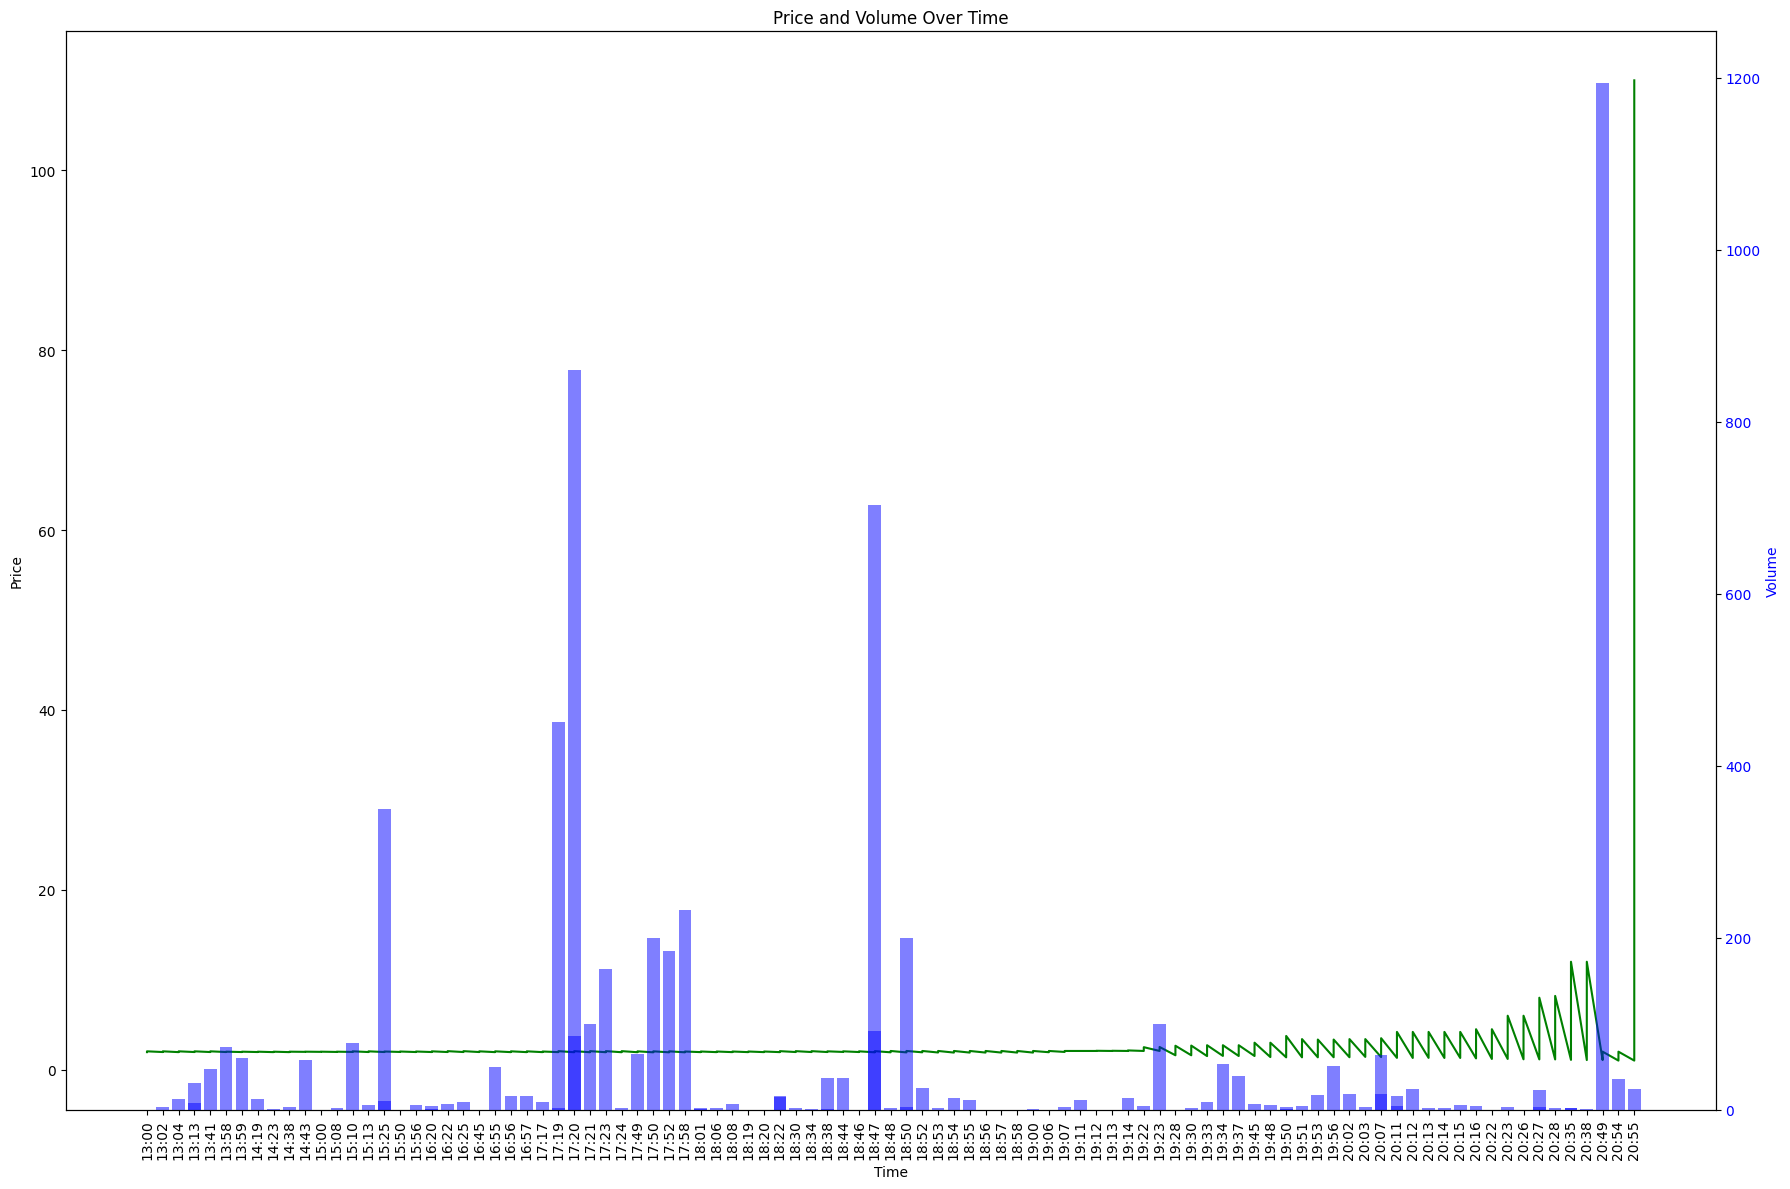

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import time
import re  # Import the regular expression module

# Configuration of the Chrome webdriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)

# Initialize the Chrome webdriver
driver = webdriver.Chrome(options=options)

# Navigate to the specified URL
driver.get('https://www.excapper.com/?action=game&id=33192456#tab_content_227598898')

# Wait for the page to load
time.sleep(5)

# Extract data from the table
table = driver.find_element(By.XPATH, '//*[@id="tab_content_227598898"]/div[6]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Initialize lists to store data
time_data = []
price_yes_data = []
volume_yes_data = []

# Parse the table rows
for row in rows[1:]:  # Skip the header row
    columns = row.find_elements(By.TAG_NAME, "td")
    if len(columns) >= 10:  # Ensure the row has at least 10 columns
        time_text = columns[1].text.split(" ")[0]
        odds_text = columns[7].text
        volume_text = columns[4].text.split('€')[0]  # Extract the numeric part before the euro sign
        volume_text = re.sub(r'[^\d]', '', volume_text)  # Extract only digits using regular expression
        if volume_text.isdigit():  # Check if the volume data is numeric after cleaning
            time_data.append(time_text)  # Extract time data
            price_yes_data.append(float(odds_text))  # Extract odds data for price
            volume_yes_data.append(int(volume_text))  # Extract volume data
        else:
            print("Volume data is not numeric:", columns[4].text)
    else:
        print("Row does not have enough columns:", [col.text for col in columns])

# Close the webdriver
driver.quit()

# Print the extracted data (for verification)
print("Time Data:", time_data)
print("Price (Yes) Data:", price_yes_data)
print("Volume (Yes) Data:", volume_yes_data)

# Sort the time data
time_data_sorted, price_yes_data_sorted, volume_yes_data_sorted = zip(*sorted(zip(time_data, price_yes_data, volume_yes_data)))

# Now, proceed to create the chart using the extracted data
# Plot the chart
fig, ax1 = plt.subplots(figsize=(18, 12))

ax1.plot(time_data_sorted, price_yes_data_sorted, label='Price', linestyle='-', color='green')
ax1.set_ylabel('Price')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()
ax2.bar(time_data_sorted, volume_yes_data_sorted, label='Volume', color='blue', alpha=0.5)
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Price and Volume Over Time')
plt.tight_layout()

# Save the graph in a folder
output_folder = 'graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'Price and Volume Over Time_graph.png')
plt.savefig(output_file)

plt.show()


# Both teams to score (Graph Money )

Row does not have enough columns: []
Time Data: ['13:00', '13:02', '13:04', '13:13', '13:41', '13:58', '13:59', '14:19', '14:23', '14:38', '14:43', '15:00', '15:08', '15:10', '15:13', '15:25', '15:50', '15:56', '16:20', '16:22', '16:25', '16:45', '16:55', '16:56', '16:57', '17:17', '17:19', '17:20', '17:21', '17:23', '17:24', '17:49', '17:50', '17:52', '17:58', '18:01', '18:06', '18:08', '18:19', '18:20', '18:22', '18:30', '18:34', '18:38', '18:44', '18:46', '18:47', '18:48', '18:50', '18:52', '18:53', '18:54', '18:55', '18:56', '18:57', '18:58', '19:00', '19:06', '19:07', '19:11', '19:12', '19:13', '19:14', '19:22', '19:23', '19:28', '19:30', '19:33', '19:34', '19:37', '19:45', '19:48', '19:50', '19:51', '19:53', '19:56', '20:02', '20:03', '20:07', '20:11', '20:12', '20:13', '20:14', '20:15', '20:16', '20:22', '20:23', '20:26', '20:27', '20:28', '20:35', '20:38', '20:49', '20:54', '20:55']
Summ (Yes) Data: [41, 44, 56, 87, 134, 134, 134, 146, 147, 150, 208, 208, 210, 210, 215, 565, 56

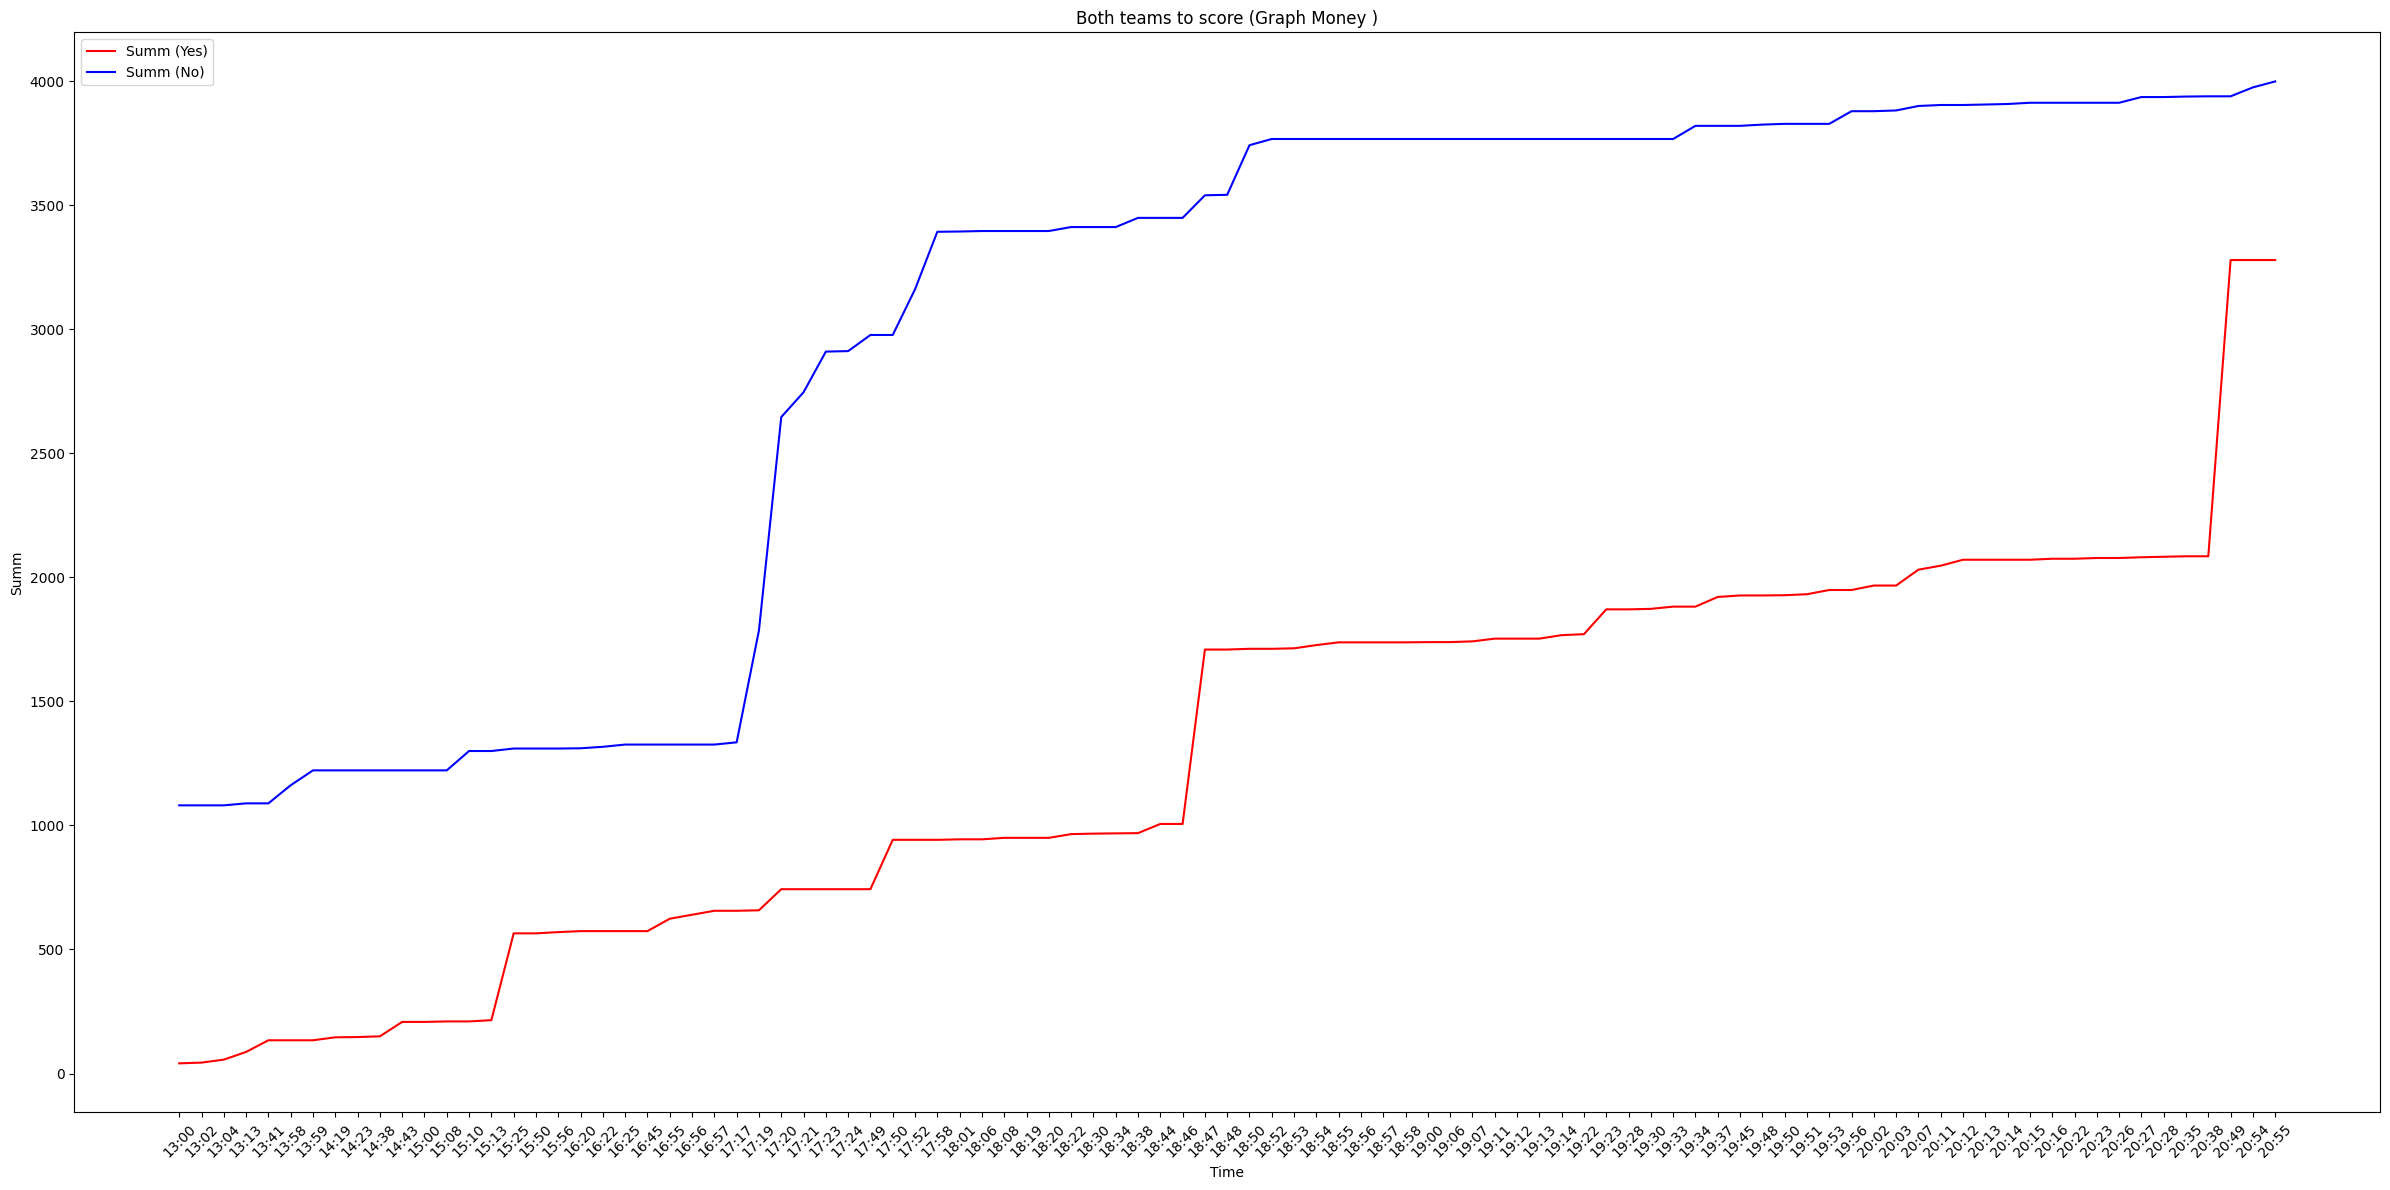

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import time
import re
import os

# Configuration of the Chrome webdriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)

# Initialize the Chrome webdriver
driver = webdriver.Chrome(options=options)

# Navigate to the specified URL
driver.get('https://www.excapper.com/?action=game&id=33192456#tab_content_227598898')

# Wait for the page to load
time.sleep(5)

# Extract data from the table
table = driver.find_element(By.XPATH, '//*[@id="tab_content_227598898"]/div[6]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Initialize lists to store data
time_data = []
yes_summ_data = []
no_summ_data = []

# Parse the table rows
for row in rows[1:]:  # Skip the header row
    columns = row.find_elements(By.TAG_NAME, "td")
    if len(columns) >= 4:  # Ensure the row has at least 4 columns
        option_text = columns[2].text
        time_text = columns[1].text.split(" ")[0]
        if columns[3].text:  # Check if the third column has non-empty text
            summ_text = columns[3].text.split('€')[0]  # Extract the numeric part before the euro sign
            summ_text = re.sub(r'[^\d]', '', summ_text)  # Extract only digits using regular expression
            if summ_text.isdigit():  # Check if the summ data is numeric after cleaning
                if time_text not in time_data:  # Add time value only if it's not already present
                    time_data.append(time_text)
                    if option_text == 'Yes':
                        yes_summ_data.append(int(summ_text))  # Extract summ data for Yes
                        no_summ_data.append(0)  # No data for No option
                    elif option_text == 'No':
                        no_summ_data.append(int(summ_text))  # Extract summ data for No
                        yes_summ_data.append(0)  # No data for Yes option
                    else:
                        print("Invalid option:", option_text)
                else:
                    # Update existing time entry
                    index = time_data.index(time_text)
                    if option_text == 'Yes':
                        yes_summ_data[index] = int(summ_text)
                    elif option_text == 'No':
                        no_summ_data[index] = int(summ_text)
                    else:
                        print("Invalid option:", option_text)
            else:
                print("Summ data is not numeric for time:", time_text)
        else:
            print("Summ data is missing for time:", time_text)
    else:
        print("Row does not have enough columns:", [col.text for col in columns])

# Close the webdriver
driver.quit()

# Reverse the time data
time_data.reverse()
yes_summ_data.reverse()
no_summ_data.reverse()

# Print the extracted data (for verification)
print("Time Data:", time_data)
print("Summ (Yes) Data:", yes_summ_data)
print("Summ (No) Data:", no_summ_data)

# Plot the graph
plt.figure(figsize=(24, 12))

plt.plot(time_data, yes_summ_data, label='Summ (Yes)', linestyle='-', color='red')
plt.plot(time_data, no_summ_data, label='Summ (No)', linestyle='-', color='blue')

plt.xlabel('Time')
plt.ylabel('Summ')
plt.title('Both teams to score (Graph Money )')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the graph in a folder
output_folder = 'graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'money_graph.png')
plt.savefig(output_file)

# Display the graph
plt.show()


# Both teams to score (Graph Odds )

Row does not have enough columns: []
Time Data: ('13:00', '13:02', '13:04', '13:13', '13:41', '13:58', '13:59', '14:19', '14:23', '14:38', '14:43', '15:00', '15:08', '15:10', '15:13', '15:25', '15:50', '15:56', '16:20', '16:22', '16:25', '16:45', '16:55', '16:56', '16:57', '17:17', '17:19', '17:20', '17:21', '17:23', '17:24', '17:49', '17:50', '17:52', '17:58', '18:01', '18:06', '18:08', '18:19', '18:20', '18:22', '18:30', '18:34', '18:38', '18:44', '18:46', '18:47', '18:48', '18:50', '18:52', '18:53', '18:54', '18:55', '18:56', '18:57', '18:58', '19:00', '19:06', '19:07', '19:11', '19:12', '19:13', '19:14', '19:22', '19:23', '19:28', '19:30', '19:33', '19:34', '19:37', '19:45', '19:48', '19:50', '19:51', '19:53', '19:56', '20:02', '20:03', '20:07', '20:11', '20:12', '20:13', '20:14', '20:15', '20:16', '20:22', '20:23', '20:26', '20:27', '20:28', '20:35', '20:38', '20:49', '20:54', '20:55')
Odds (Yes) Data: (1.95, 1.96, 1.95, 1.96, 1.96, 1.96, 1.96, 1.96, 1.95, 1.95, 1.98, 1.98, 1.97, 

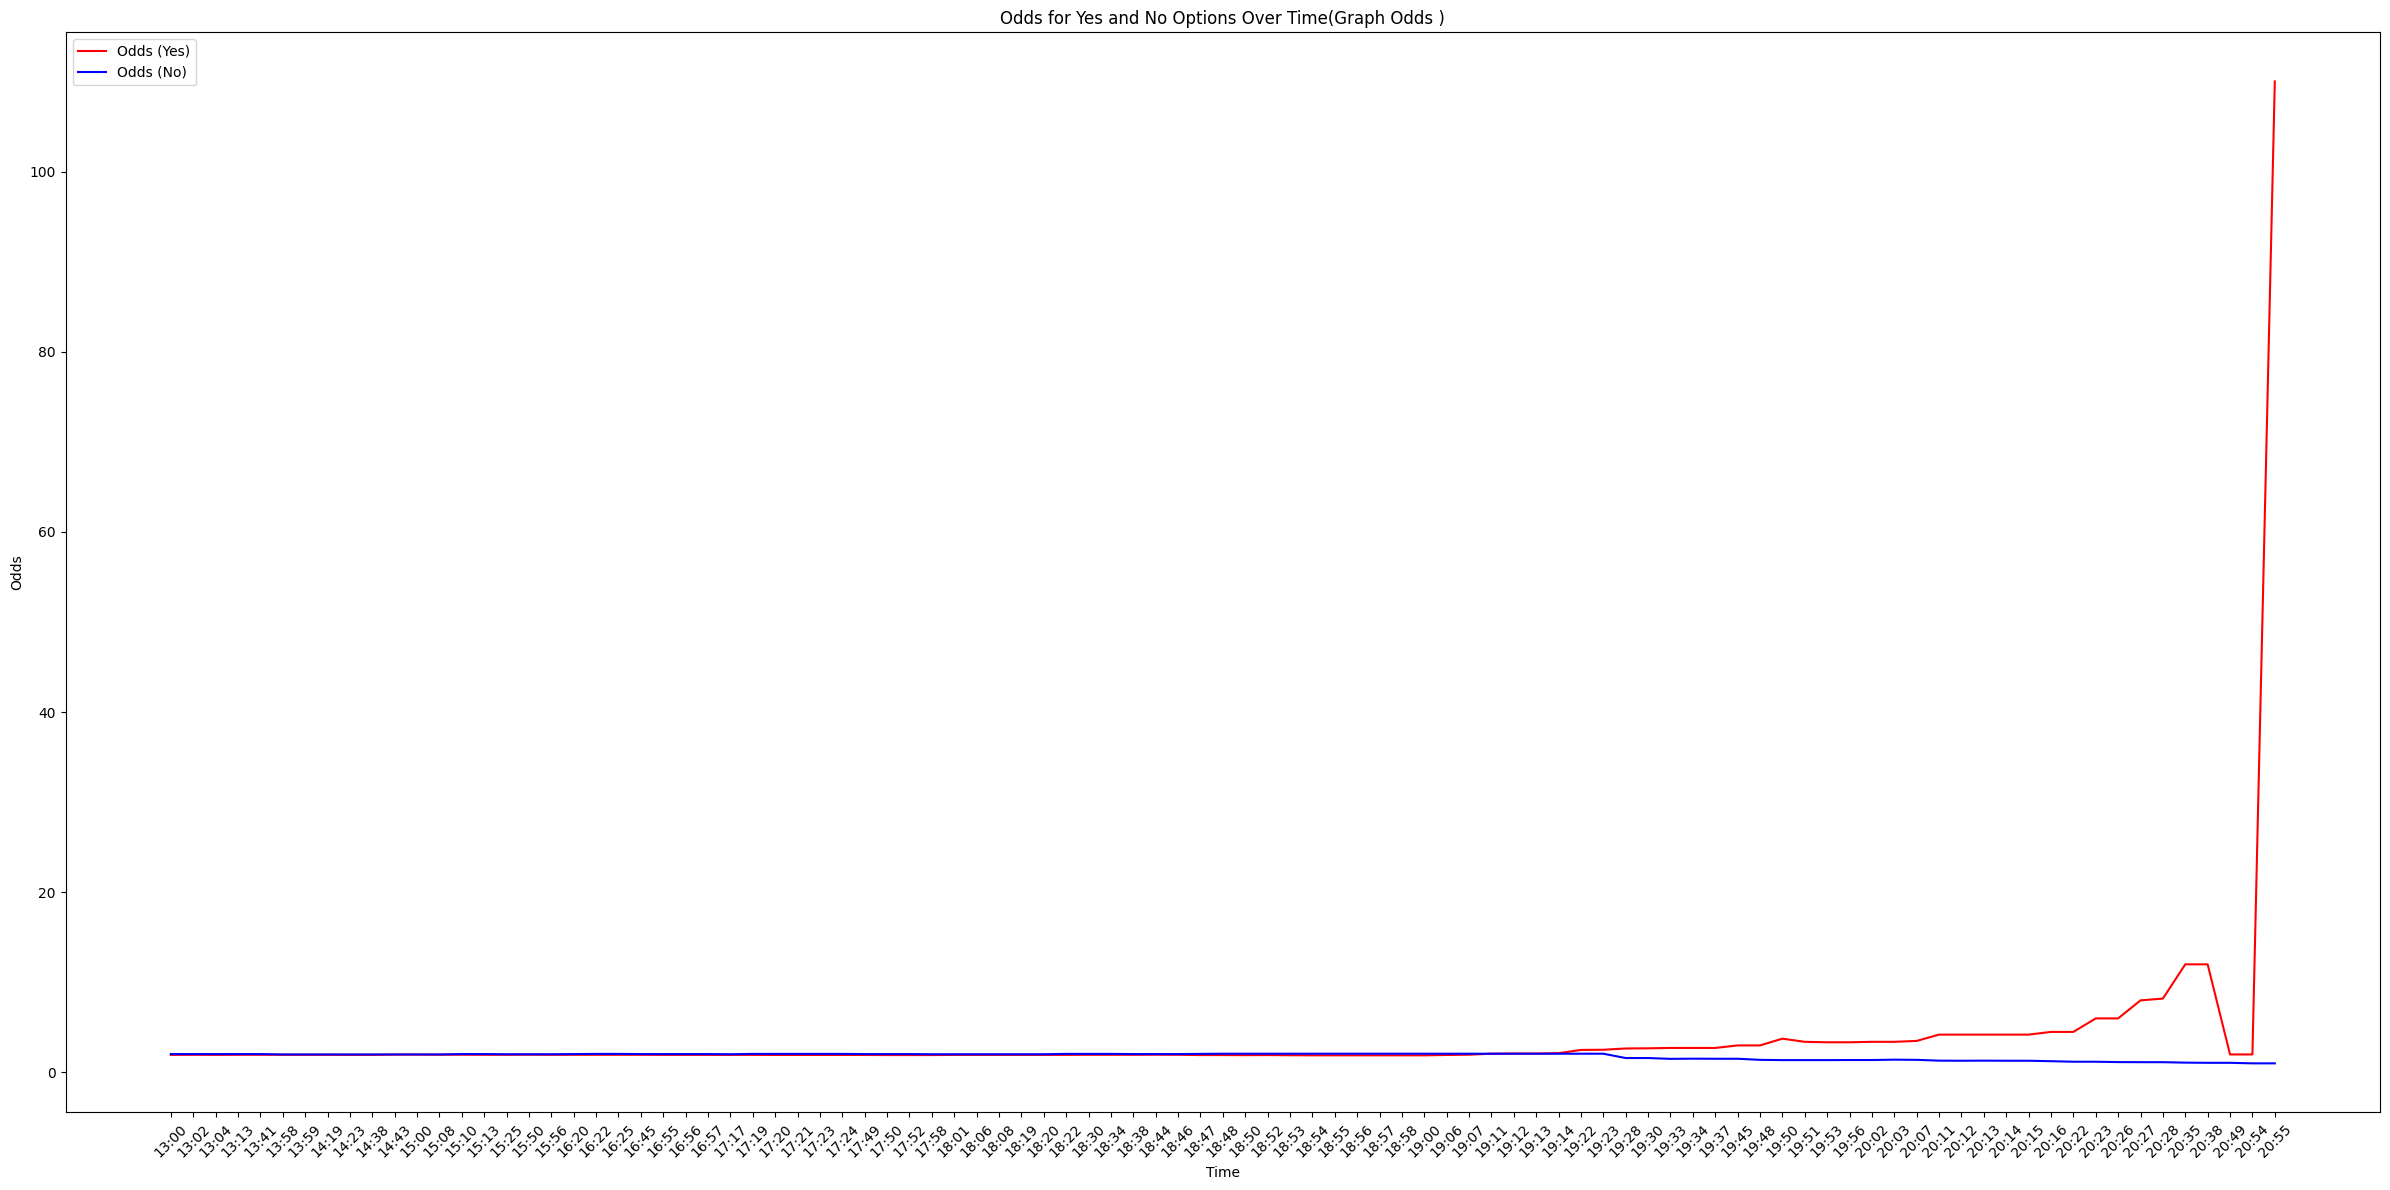

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import time
import re
import os

# Configuration of the Chrome webdriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)

# Initialize the Chrome webdriver
driver = webdriver.Chrome(options=options)

# Navigate to the specified URL
driver.get('https://www.excapper.com/?action=game&id=33192456#tab_content_227598898')

# Wait for the page to load
time.sleep(5)

# Extract data from the table
table = driver.find_element(By.XPATH, '//*[@id="tab_content_227598898"]/div[6]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Initialize lists to store data
time_data = []
yes_odds_data = []
no_odds_data = []

# Parse the table rows
for row in rows[1:]:  # Skip the header row
    columns = row.find_elements(By.TAG_NAME, "td")
    if len(columns) >= 10:  # Ensure the row has at least 10 columns
        option_text = columns[2].text
        time_text = columns[1].text.split(" ")[0]
        if columns[7].text:  # Check if the seventh column has non-empty text
            odds_text = columns[7].text.split('€')[0]  # Extract the numeric part before the euro sign
            odds_text = re.sub(r'[^\d.]', '', odds_text)  # Extract only digits and dot using regular expression
            if odds_text:  # Check if the odds data is not empty after cleaning
                time_data.append(time_text)  # Extract time data
                if option_text == 'Yes':
                    yes_odds_data.append(float(odds_text))  # Extract odds data for Yes
                    no_odds_data.append(None)  # Placeholder for No data
                elif option_text == 'No':
                    no_odds_data.append(float(odds_text))  # Extract odds data for No
                    yes_odds_data.append(None)  # Placeholder for Yes data
                else:
                    print("Invalid option:", option_text)
            else:
                print("Odds data is empty for time:", time_text)
        else:
            print("Odds data is missing for time:", time_text)
    else:
        print("Row does not have enough columns:", [col.text for col in columns])

# Close the webdriver
driver.quit()

# Remove None values and corresponding time data
time_data_filtered = [time_data[i] for i in range(len(time_data)) if yes_odds_data[i] is not None]
yes_odds_data_filtered = [odds for odds in yes_odds_data if odds is not None]
no_odds_data_filtered = [odds for odds in no_odds_data if odds is not None]

# Sort time data and corresponding odds data
time_data_sorted, yes_odds_data_sorted = zip(*sorted(zip(time_data_filtered, yes_odds_data_filtered)))
_, no_odds_data_sorted = zip(*sorted(zip(time_data_filtered, no_odds_data_filtered)))

# Print the extracted data (for verification)
print("Time Data:", time_data_sorted)
print("Odds (Yes) Data:", yes_odds_data_sorted)
print("Odds (No) Data:", no_odds_data_sorted)

# Plot the graph
plt.figure(figsize=(24, 12))

plt.plot(time_data_sorted, yes_odds_data_sorted, label='Odds (Yes)', linestyle='-', color='red')
plt.plot(time_data_sorted, no_odds_data_sorted, label='Odds (No)', linestyle='-', color='blue')

plt.xlabel('Time')
plt.ylabel('Odds')
plt.title('Odds for Yes and No Options Over Time(Graph Odds )')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the graph in a folder
output_folder = 'graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'odds_graph.png')
plt.savefig(output_file)

# Display the graph
plt.show()


# # Both teams to score (Graph Percentage )

Row does not have enough columns: []
Time Data: ('13:00', '13:02', '13:04', '13:13', '13:41', '13:58', '13:59', '14:19', '14:23', '14:38', '14:43', '15:00', '15:08', '15:10', '15:13', '15:25', '15:50', '15:56', '16:20', '16:22', '16:25', '16:45', '16:55', '16:56', '16:57', '17:17', '17:19', '17:20', '17:21', '17:23', '17:24', '17:49', '17:50', '17:52', '17:58', '18:01', '18:06', '18:08', '18:19', '18:20', '18:22', '18:30', '18:34', '18:38', '18:44', '18:46', '18:47', '18:48', '18:50', '18:52', '18:53', '18:54', '18:55', '18:56', '18:57', '18:58', '19:00', '19:06', '19:07', '19:11', '19:12', '19:13', '19:14', '19:22', '19:23', '19:28', '19:30', '19:33', '19:34', '19:37', '19:45', '19:48', '19:50', '19:51', '19:53', '19:56', '20:02', '20:03', '20:07', '20:11', '20:12', '20:13', '20:14', '20:15', '20:16', '20:22', '20:23', '20:26', '20:27', '20:28', '20:35', '20:38', '20:49', '20:54', '20:55')
percentage (Yes) Data: (3.0, 3.0, 4.0, 7.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 14.0, 14.0, 14.0,

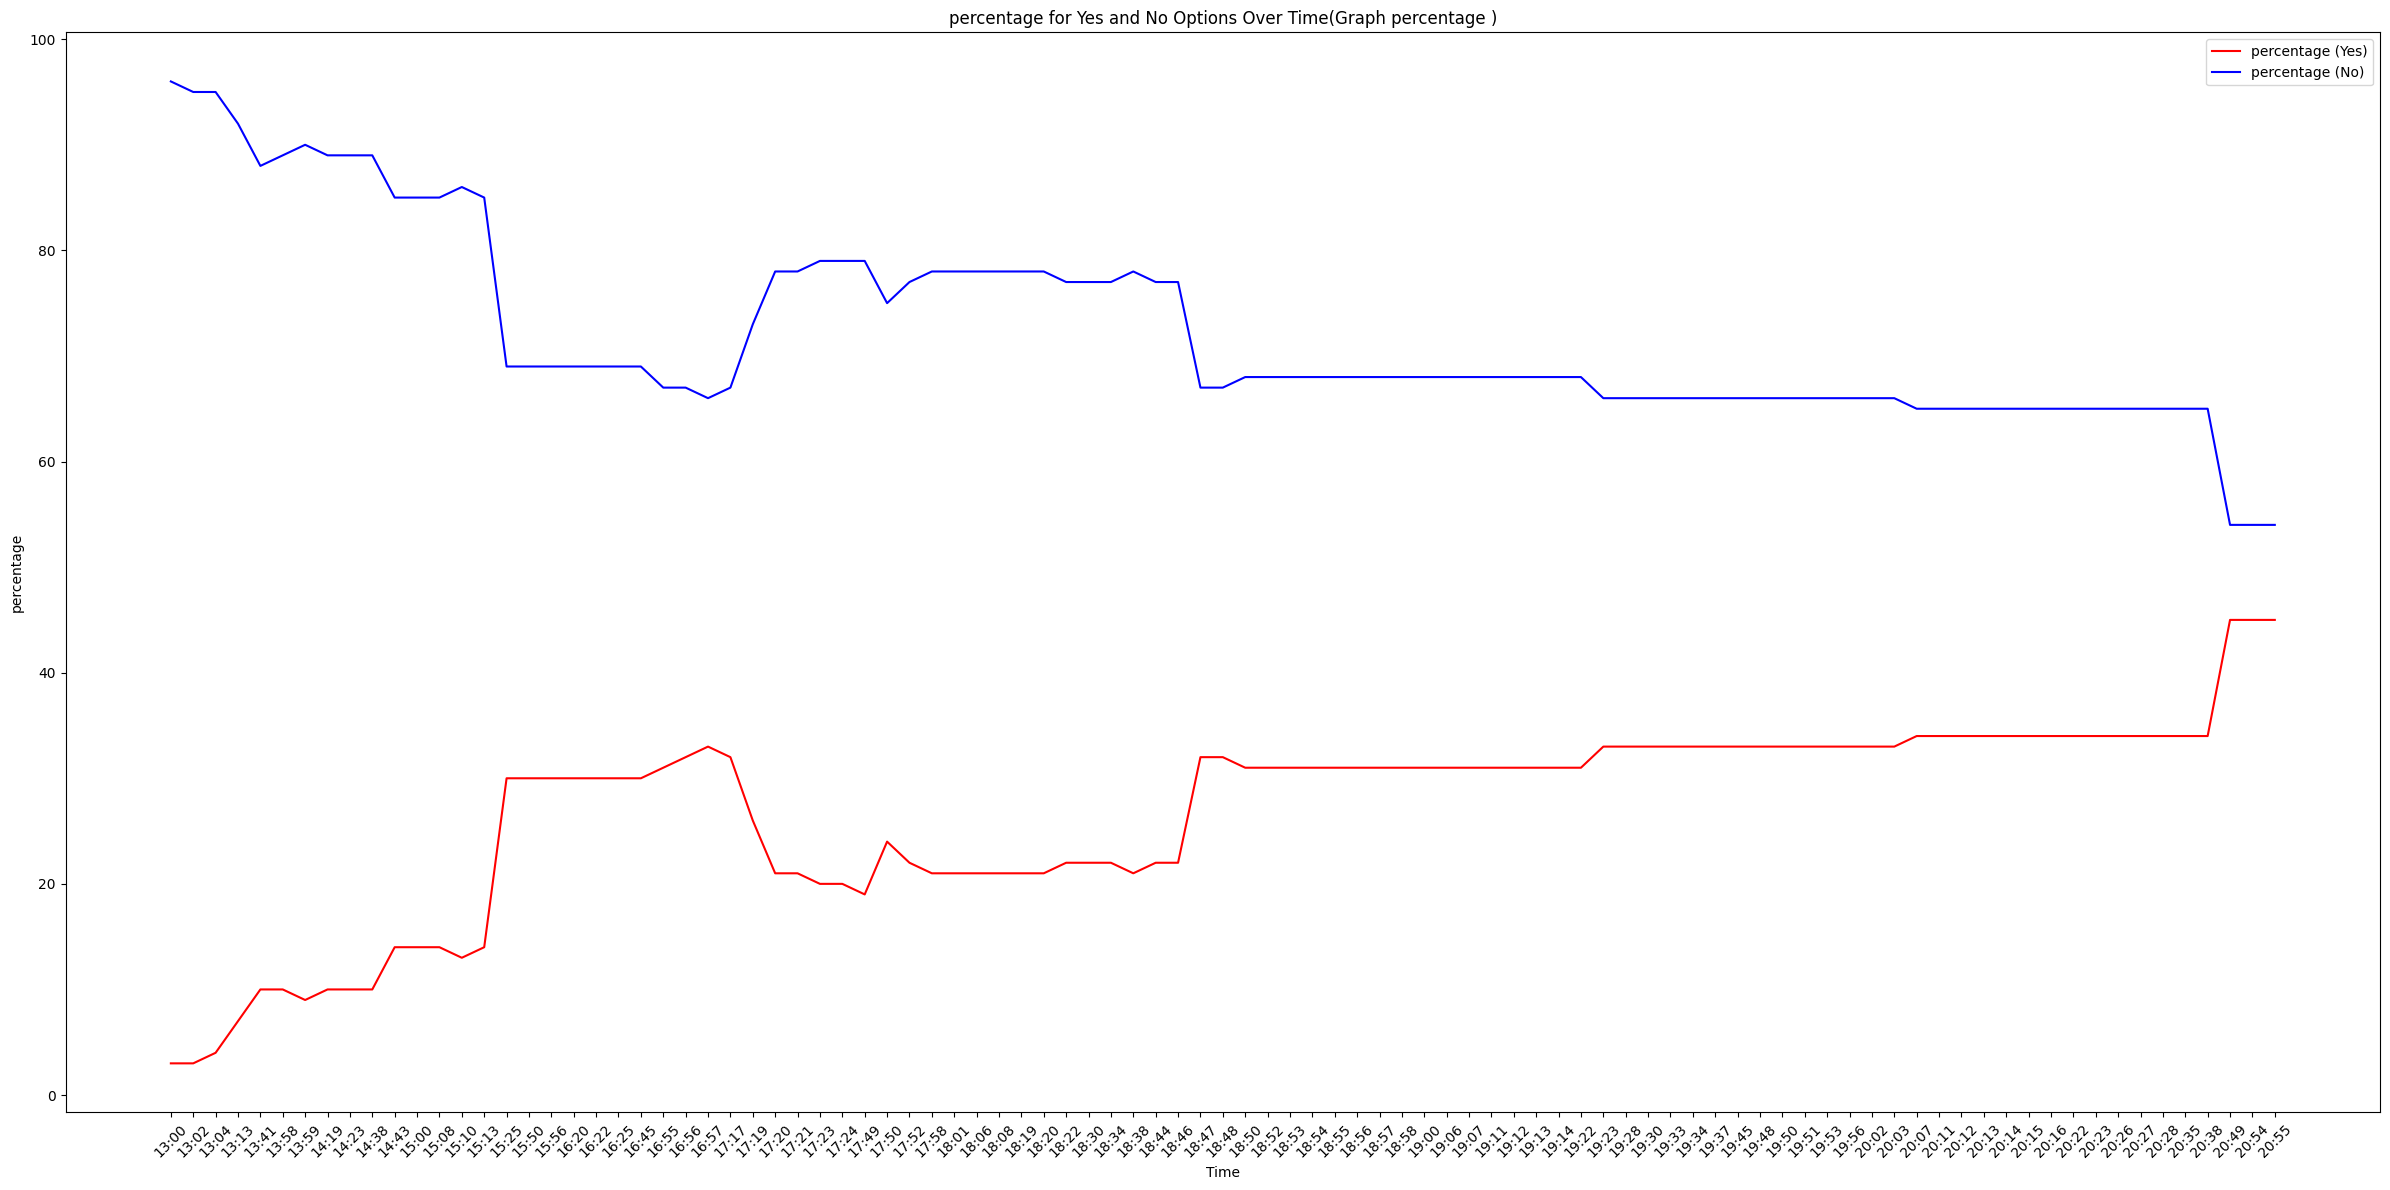

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import time
import re
import os

# Configuration of the Chrome webdriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)

# Initialize the Chrome webdriver
driver = webdriver.Chrome(options=options)

# Navigate to the specified URL
driver.get('https://www.excapper.com/?action=game&id=33192456#tab_content_227598898')

# Wait for the page to load
time.sleep(5)

# Extract data from the table
table = driver.find_element(By.XPATH, '//*[@id="tab_content_227598898"]/div[6]')
rows = table.find_elements(By.TAG_NAME, "tr")

# Initialize lists to store data
time_data = []
yes_percentage_data = []
no_percentage_data = []

# Parse the table rows
for row in rows[1:]:  # Skip the header row
    columns = row.find_elements(By.TAG_NAME, "td")
    if len(columns) >= 10:  # Ensure the row has at least 10 columns
        option_text = columns[2].text
        time_text = columns[1].text.split(" ")[0]
        if columns[10].text:  # Check if the seventh column has non-empty text
            percentage_text = columns[10].text.split('€')[0]  # Extract the numeric part before the euro sign
            percentage_text = re.sub(r'[^\d.]', '', percentage_text)  # Extract only digits and dot using regular expression
            if percentage_text:  # Check if the percentage data is not empty after cleaning
                time_data.append(time_text)  # Extract time data
                if option_text == 'Yes':
                    yes_percentage_data.append(float(percentage_text))  # Extract percentage data for Yes
                    no_percentage_data.append(None)  # Placeholder for No data
                elif option_text == 'No':
                    no_percentage_data.append(float(percentage_text))  # Extract percentage data for No
                    yes_percentage_data.append(None)  # Placeholder for Yes data
                else:
                    print("Invalid option:", option_text)
            else:
                print("percentage data is empty for time:", time_text)
        else:
            print("percentage data is missing for time:", time_text)
    else:
        print("Row does not have enough columns:", [col.text for col in columns])

# Close the webdriver
driver.quit()

# Remove None values and corresponding time data
time_data_filtered = [time_data[i] for i in range(len(time_data)) if yes_percentage_data[i] is not None]
yes_percentage_data_filtered = [percentage for percentage in yes_percentage_data if percentage is not None]
no_percentage_data_filtered = [percentage for percentage in no_percentage_data if percentage is not None]

# Sort time data and corresponding percentage data
time_data_sorted, yes_percentage_data_sorted = zip(*sorted(zip(time_data_filtered, yes_percentage_data_filtered)))
_, no_percentage_data_sorted = zip(*sorted(zip(time_data_filtered, no_percentage_data_filtered)))

# Print the extracted data (for verification)
print("Time Data:", time_data_sorted)
print("percentage (Yes) Data:", yes_percentage_data_sorted)
print("percentage (No) Data:", no_percentage_data_sorted)

# Plot the graph
plt.figure(figsize=(24, 12))

plt.plot(time_data_sorted, yes_percentage_data_sorted, label='percentage (Yes)', linestyle='-', color='red')
plt.plot(time_data_sorted, no_percentage_data_sorted, label='percentage (No)', linestyle='-', color='blue')

plt.xlabel('Time')
plt.ylabel('percentage')
plt.title('percentage for Yes and No Options Over Time(Graph percentage )')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the graph in a folder
output_folder = 'graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'percentage_graph.png')
plt.savefig(output_file)

# Display the graph
plt.show()


In [1]:
import base64

encoded_string = "cGljb0NURnt0aGVfbTN0YWRhdGFfMXNfbW9kaWZpZWR9"
decoded_bytes = base64.b64decode(encoded_string)
decoded_text = decoded_bytes.decode("utf-8")

print(decoded_text)


picoCTF{the_m3tadata_1s_modified}
